In [26]:
# ติดตั้ง OpenCV
!pip install -q opencv-python-headless

#Match Template Technique

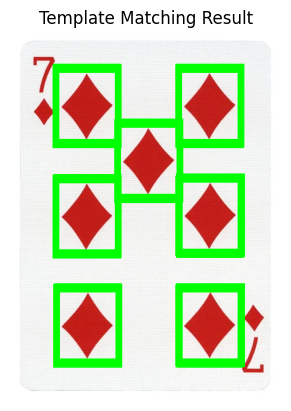

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# โหลดภาพหลักและภาพเทมเพลต
main_image_path = "main_image.jpg"  # ที่อยู่ของภาพหลัก
template_image_path = "template_image.jpg"  # ที่อยู่ของภาพเทมเพลต

main_image = cv2.imread(main_image_path)  # อ่านภาพหลัก
template = cv2.imread(template_image_path)  # อ่านภาพเทมเพลต

# แปลงภาพเป็นสีเทาสำหรับ Template Matching
main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)  # แปลงภาพหลักเป็นสีเทา
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)  # แปลงภาพเทมเพลตเป็นสีเทา

# ดึงขนาดของภาพเทมเพลต
template_height, template_width = template_gray.shape  # ได้ค่าความสูงและความกว้างของเทมเพลต

# ทำ Template Matching
result = cv2.matchTemplate(main_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# กำหนด Threshold (ค่าความคล้ายที่ยอมรับ)
threshold = 0.8  # ค่า Threshold ที่ปรับได้ตามความต้องการ
locations = np.where(result >= threshold)  # หา Location ที่ผลลัพธ์ตรงตาม Threshold

# วาดกรอบสี่เหลี่ยมรอบตำแหน่งที่พบเทมเพลต
for pt in zip(*locations[::-1]):  # สลับค่าพิกัด x, y ให้ตรงกับภาพ
    cv2.rectangle(main_image, pt, (pt[0] + template_width, pt[1] + template_height), (0, 255, 0), 1)

# ฟังก์ชันสำหรับแสดงภาพ
def display_image(image, title="Image"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # แปลงภาพจาก BGR เป็น RGB สำหรับการแสดงผลใน Matplotlib
    plt.imshow(image_rgb)  # แสดงภาพ
    plt.title(title)  # ชื่อภาพ
    plt.axis("off")  # ปิดการแสดงแกน
    plt.show()

display_image(main_image, title="Template Matching Result")


#Harr Cascase

##ตรวจจับใบหน้า

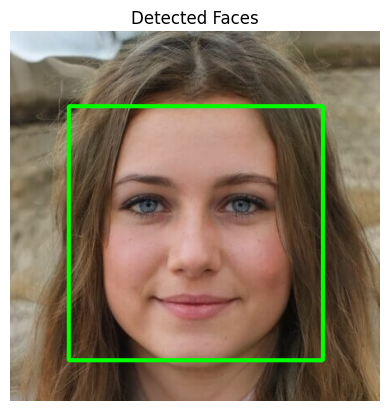

In [23]:
import cv2
import matplotlib.pyplot as plt

# โหลด Haar Cascade สำหรับตรวจจับใบหน้า
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# โหลดภาพและแปลงเป็นภาพระดับสีเทา
image = cv2.imread("test_face_image.jpg")  # เปลี่ยนเป็น path ของภาพที่ต้องการ
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ตรวจจับใบหน้า
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# วาดกรอบสี่เหลี่ยมรอบใบหน้าที่ตรวจพบ
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)  # วาดกรอบสีเขียว

# แสดงผลลัพธ์
def display_image(image, title="Detected Faces"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

display_image(image, title="Detected Faces")


##ตรจจับดวงตา

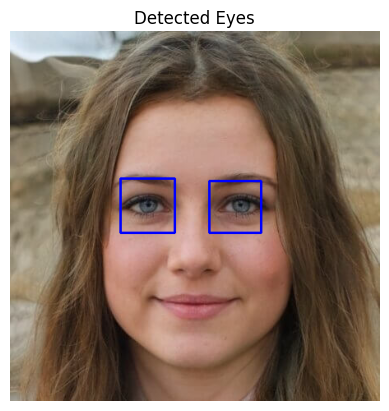

In [24]:
import cv2
import matplotlib.pyplot as plt

# โหลด Haar Cascade สำหรับตรวจจับดวงตา
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# โหลดภาพและแปลงเป็นภาพระดับสีเทา
image = cv2.imread("test_face_image.jpg")  # เปลี่ยนเป็น path ของภาพที่ต้องการ
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ตรวจจับดวงตา
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10, minSize=(15, 15))

# วาดกรอบสี่เหลี่ยมรอบดวงตาที่ตรวจพบ
for (x, y, w, h) in eyes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # วาดกรอบสีน้ำเงิน

# แสดงผลลัพธ์
def display_image(image, title="Detected Eyes"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

display_image(image, title="Detected Eyes")


##ตรวจจับดวงตาและใบหน้้า

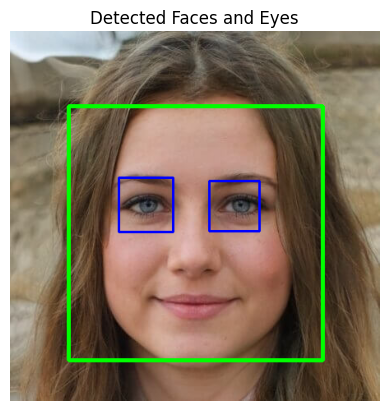

In [22]:
import cv2
import matplotlib.pyplot as plt

# โหลด Haar Cascades สำหรับตรวจจับใบหน้าและดวงตา
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# โหลดภาพและแปลงเป็นภาพระดับสีเทา
image = cv2.imread("test_face_image.jpg")  # เปลี่ยนเป็น path ของภาพที่ต้องการ
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ตรวจจับใบหน้า
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# ตรวจจับดวงตาภายในกรอบใบหน้าที่ตรวจพบ
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)  # วาดกรอบสีเขียวสำหรับใบหน้า

    # โฟกัสบริเวณใบหน้าเพื่อตรวจจับดวงตา
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.3, minNeighbors=10, minSize=(15, 15))

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)  # วาดกรอบสีน้ำเงินสำหรับดวงตา

# แสดงผลลัพธ์
def display_image(image, title="Detected Faces and Eyes"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

display_image(image, title="Detected Faces and Eyes")


#YOLO Technique

In [ ]:
# ติดตั้ง OpenCV หากยังไม่ได้ติดตั้ง
!pip -q install opencv-python

# ดาวน์โหลดไฟล์ YOLO Model และ Class Labels (หากยังไม่มี)
!wget -q https://pjreddie.com/media/files/yolov3.weights
!wget -q https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg
!wget -q https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names


In [ ]:
#นำเข้า cv2 สำหรับการทำงานเกี่ยวกับภาพ
#นำเข้า numpy สำหรับการจัดการข้อมูลแบบเมทริกซ์
#นำเข้า matplotlib.pyplot สำหรับการแสดงผลภาพ
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# โหลดโมเดล YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# โหลดชื่อคลาส
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# ดึงชื่อของเลเยอร์เอาต์พุต
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


In [ ]:
# ตั้งค่าสีสุ่มสำหรับแต่ละคลาส
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# โหลดภาพ
image = cv2.imread("test_yolo_image.jpg")  # แทนที่ด้วย path ของภาพ
height, width, _ = image.shape

In [ ]:
# แปลงภาพให้อยู่ในรูปแบบที่ YOLO ต้องการ
blob = cv2.dnn.blobFromImage(image, scalefactor=0.00392, size=(416, 416), mean=(0, 0, 0), swapRB=True, crop=False)
net.setInput(blob)


In [ ]:
# ประมวลผลโมเดล
outputs = net.forward(output_layers)

# เก็บข้อมูลที่ตรวจจับได้
class_ids = []
confidences = []
boxes = []

# ประมวลผลเอาต์พุต
for output in outputs:
    for detection in output:
        scores = detection[5:]  # ข้ามค่าที่เกี่ยวกับตำแหน่ง
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # ตรวจจับเฉพาะผลลัพธ์ที่มีความมั่นใจสูง
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [ ]:
# ใช้ Non-Maximum Suppression เพื่อลดการซ้อนทับ
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# วาดกรอบและชื่อคลาส
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    color = colors[class_ids[i]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 5)
    cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)


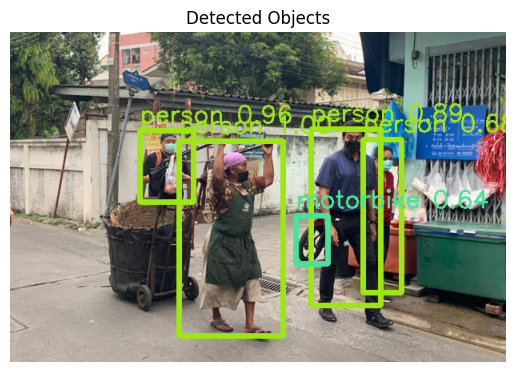

In [ ]:
# ฟังก์ชันแสดงภาพ
def display_image(image, title="Detected Objects"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

# แสดงภาพที่มีกรอบวัตถุ
display_image(image, title="Detected Objects")


In [ ]:
# Save
output_path = "output_image.jpg"
cv2.imwrite(output_path, image)
print(f"Image saved as {output_path}")

Image saved as output_image.jpg
